In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(font_scale=1.1)
sns.set_style('ticks')

In [3]:
## get the losses

run=1
with open('./models/ablation_study/shuffled_labels/shuffle_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
    l_s =  np.load(f)

with open('./models/ablation_study/training_data/losses_frac_1.00_n750_run%i.npy'%run, 'rb') as f:
    l_750 = np.load(f)
        

with open('./models/ablation_study/training_data/losses_frac_1.00_n600_run%i.npy'%run, 'rb') as f:
    l_600 = np.load(f)
        
with open('./models/ablation_study/training_data/losses_frac_1.00_n450_run%i.npy'%run, 'rb') as f:
    l_450 = np.load(f)

with open('./models/ablation_study/training_data/losses_frac_1.00_n300_run%i.npy'%run, 'rb') as f:
    l_300 = np.load(f)
    
with open('./models/ablation_study/training_data/losses_frac_1.00_n150_run%i.npy'%run, 'rb') as f:
    l_150 = np.load(f)
    
with open('./models/ablation_study/walk_length/wl8_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
    l_wl8 = np.load(f)
    
with open('./models/ablation_study/walk_length/wl32_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
    l_wl32 = np.load(f)

with open('./models/3_populations/losses_emb32_hid32_lat32_dp0.1_k500_max_frac1.0_%i.npy'%run, 'rb') as f:
    l_sup = np.load(f)

with open('./models/3_populations/losses_emb32_hid32_lat32_dp0.1_k500_max_frac0.0_%i.npy'%run, 'rb') as f:
    l_unsup = np.load(f)
        
for run in range(2,4):
    with open('./models/ablation_study/shuffled_labels/shuffle_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
        l_s = np.concatenate((l_s, np.load(f)), axis=1)

    with open('./models/ablation_study/training_data/losses_frac_1.00_n750_run%i.npy'%run, 'rb') as f:
        l_750 = np.concatenate((l_750,np.load(f)), axis=1)
        
    with open('./models/ablation_study/training_data/losses_frac_1.00_n600_run%i.npy'%run, 'rb') as f:
        l_600 = np.concatenate((l_600,np.load(f)), axis=1)
        
    with open('./models/ablation_study/training_data/losses_frac_1.00_n450_run%i.npy'%run, 'rb') as f:
        l_450 = np.concatenate((l_450,np.load(f)), axis=1)

    with open('./models/ablation_study/training_data/losses_frac_1.00_n300_run%i.npy'%run, 'rb') as f:
        l_300 = np.concatenate((l_300,np.load(f)), axis=1)
    
    with open('./models/ablation_study/training_data/losses_frac_1.00_n150_run%i.npy'%run, 'rb') as f:
        l_150 = np.concatenate((l_150,np.load(f)), axis=1)
    
    with open('./models/ablation_study/walk_length/wl8_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
        l_wl8 = np.concatenate((l_wl8,np.load(f)), axis=1)

    with open('./models/ablation_study/walk_length/wl32_losses_frac_1.00_run%i.npy'%run, 'rb') as f:
        l_wl32 = np.concatenate((l_wl32,np.load(f)), axis=1)
        
    with open('./models/3_populations/losses_emb32_hid32_lat32_dp0.1_k500_max_frac1.0_%i.npy'%run, 'rb') as f:
        l_sup = np.concatenate((l_sup,np.load(f)), axis=1)

    with open('./models/3_populations/losses_emb32_hid32_lat32_dp0.1_k500_max_frac0.0_%i.npy'%run, 'rb') as f:
        l_unsup = np.concatenate((l_unsup, np.load(f)), axis=1)

Text(0.5, 0.98, 'Amount of training data')

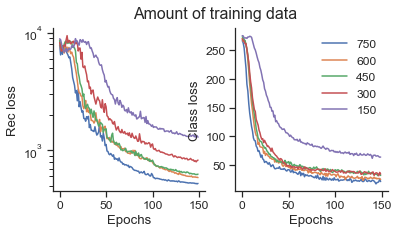

In [4]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.plot((l_750[:,2::4]-l_750[:,3::4]).mean(axis=1), label='750')
plt.plot((l_600[:,2::4]-l_600[:,3::4]).mean(axis=1), label='600')
plt.plot((l_450[:,2::4]-l_450[:,3::4]).mean(axis=1), label='450')
plt.plot((l_300[:,2::4]-l_300[:,3::4]).mean(axis=1), label='300')
plt.plot((l_150[:,2::4]-l_150[:,3::4]).mean(axis=1), label='150')

sns.despine()
plt.yscale('log')
plt.ylabel('Rec loss')
plt.xlabel('Epochs')

plt.subplot(122)
plt.plot((l_750[:,3::4]).mean(axis=1), label='750')
plt.plot((l_600[:,3::4]).mean(axis=1), label='600')
plt.plot((l_450[:,3::4]).mean(axis=1), label='450')
plt.plot((l_300[:,3::4]).mean(axis=1), label='300')
plt.plot((l_150[:,3::4]).mean(axis=1), label='150')

sns.despine()
plt.legend(frameon=False)
plt.ylabel('Class loss')
plt.xlabel('Epochs')
plt.suptitle('Amount of training data')

Text(0.5, 0.98, 'Walk length')

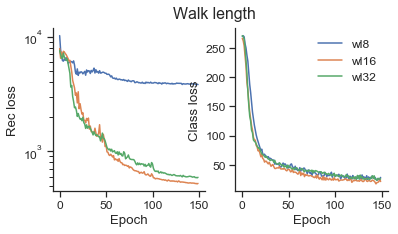

In [5]:
plt.figure(figsize=(6,3))
plt.subplot(121)

plt.plot((l_wl8[:,2::4]-l_wl8[:,3::4]).mean(axis=1), label='wl8')
plt.plot((l_750[:,2::4]-l_750[:,3::4]).mean(axis=1), label='wl16')
plt.plot((l_wl32[:,2::4]-l_wl32[:,3::4]).mean(axis=1), label='wl32')

sns.despine()
plt.ylabel('Rec loss')
plt.yscale('log')
plt.xlabel('Epoch')

plt.subplot(122)
plt.plot((l_wl8[:,3::4]).mean(axis=1), label='wl8')
plt.plot((l_750[:,3::4]).mean(axis=1), label='wl16')
plt.plot((l_wl32[:,3::4]).mean(axis=1), label='wl32')

sns.despine()
plt.legend(frameon=False)
plt.ylabel('Class loss')
plt.xlabel('Epoch')
plt.suptitle('Walk length')

Text(0.5, 0.98, 'Shuffled labels')

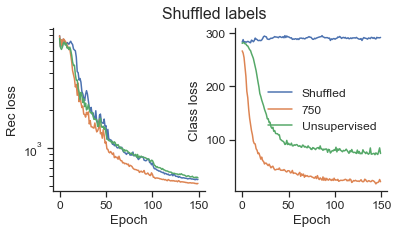

In [6]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.plot((l_s[:,2::4]-l_s[:,3::4]).mean(axis=1), label='Shuffled')
plt.plot((l_750[:,2::4]-l_750[:,3::4]).mean(axis=1), label='n750')
plt.plot((l_unsup[:,2::4]-l_unsup[:,3::4]).mean(axis=1), label='Unsupervised')

sns.despine()
plt.ylabel('Rec loss')
plt.xlabel('Epoch')
plt.yscale('log')

plt.subplot(122)
plt.plot((l_s[:,3::4]).mean(axis=1), label='Shuffled')
plt.plot((l_750[:,3::4]).mean(axis=1), label='750')
plt.plot((l_unsup[:,3::4]).mean(axis=1), label='Unsupervised')


sns.despine()
plt.legend(frameon=False)
plt.ylabel('Class loss')
plt.xlabel('Epoch')
plt.suptitle('Shuffled labels')

### Make a table

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame()
for model, data in [('standard', l_750), ('n=150', l_150), ('n=300', l_300), ('n=450', l_450), ('n=600', l_600),
                   ('shuffled', l_s), ('no labels', l_unsup ), ('wl=8', l_wl8), ('wl=32', l_wl32)]:
    
    runs = int((data.shape[1]/4) +1)
    for run in range(1,runs):
        
        epoch_ix = data[:,(run-1)*4 + 2].argmin()
        
        # validation classification loss 
        class_val = data[epoch_ix,(run-1)*4 + 3]
        
        # reconstruction loss
        rec_loss = data[epoch_ix,(run-1)*4 + 2] - data[epoch_ix,(run-1)*4 + 3]
        d = dict(Model=model, Rec=rec_loss, Class=class_val, Run=run)
        df = df.append(d, ignore_index=True)

In [13]:
order = ['standard','n=600','n=450','n=300','n=150', 'shuffled', 'no labels','wl=8', 'wl=32']
aggr = df.groupby('Model').mean().round(2)
aggr = aggr.loc[order]
aggr = aggr[['Rec', 'Class']]
# aggr.to_latex()
print(aggr.to_latex())

\begin{tabular}{lrr}
\toprule
{} &      Rec &   Class \\
Model     &          &         \\
\midrule
standard  &   519.44 &   19.03 \\
n=600     &   586.25 &   24.41 \\
n=450     &   617.08 &   30.84 \\
n=300     &   793.46 &   34.42 \\
n=150     &  1268.40 &   64.92 \\
shuffled  &   557.53 &  291.35 \\
no labels &   575.36 &   71.64 \\
wl=8      &  3737.77 &   37.05 \\
wl=32     &   583.39 &   25.74 \\
\bottomrule
\end{tabular}



In [11]:
aggr.to_latex?

In [14]:
err = df.groupby('Model').sem().round(2)
err = err.loc[order]
err = err[['Rec', 'Class']]
print(err.to_latex())

\begin{tabular}{lrr}
\toprule
{} &     Rec &  Class \\
Model     &         &        \\
\midrule
standard  &   14.51 &   1.32 \\
n=600     &    3.83 &   0.99 \\
n=450     &   11.65 &   4.52 \\
n=300     &   61.09 &   0.95 \\
n=150     &   47.27 &   6.12 \\
shuffled  &    3.95 &   1.99 \\
no labels &   11.65 &   2.58 \\
wl=8      &  295.64 &  11.03 \\
wl=32     &    6.06 &   2.82 \\
\bottomrule
\end{tabular}

